# **Laboratorio 6**

STFT, Espectrograma, señales no estacionarias, inicio de Onditas

## Librerías y funciones necesarias



In [1]:
#Importamos librerías o funciones y renombramos algunas todas juntas
import numpy as np 
from scipy.io.wavfile import read, write  #para leer y guardar archivos de audio formato wav
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift
from scipy import signal
import pywt

## Ejercicio 1

Sean las señales

$x_1(t)= 2\cos\left(17*2\pi t\right)$  

$x_2(t)= 5\cos\left(13*2\pi t\right)$  

 




Dar la frecuencia de oscilación de cada señal y su amplitud:

$x_1$ oscila 17 veces en 1 segundo: Señal con frecuencia constante de 17/s= 17 Hrtz y  amplitud 2

$x_2$ oscila 13 veces en 1 segundo: Señal con frecuencia constante de ... Hrtz y amplitud ...


Ahora las discretizadas en el intervalo $[0, 3s)$ con 768 muestras:

- Freq de Muestreo $=\frac{768}{3s}=256\frac{1}{s}=256$ Htz , 256 muestras por segundo

$t_{n}=\frac{ n}{256}\in [0, 3) $ si $n= 0,..,767$


$x_1\left[n\right]= 2\cos\left(17*2\pi t_{n}\right)   \text{ para  } n= 0,..,767$

$x_2\left[n\right]= 5\cos\left(13*2\pi t_{n}\right)   \text{ para  } n= 0,..,767$


Con respecto al muestreo realizado calcular la Frecuencia máxima de Nyquist:

Alcanza el muestreo realizado para identificar la frecuencia de dichas señales?

In [2]:
FM=768/3 #Frecuencia de muestreo 256 Htz
print (FM,'Hertz es la frecuencia de muestreo')
P=3/768
tn = np.arange(0,3,P) #Tiempo en [0,3) muestreado con 768 muestras, P=(1/FM)=(3/768) es el período de muestreo
x1 = 2*np.cos(17*2*np.pi*tn)
x2 = 5*np.cos(13*2*np.pi*tn)
#FN=   #Completar Frecuencia de Nyquist (máxima frecuencia que se puede registra con el muestreo realizado)
#print('Frecuencia de Nyquist: ', FN, 'Hertz. Es la máxima frecuencia que se puede registrar con el muestreo realizado')

256.0 Hertz es la frecuencia de muestreo



* Construimos la señal suma lugar a lugar   
$s=x_1+x_2$
* Construimos la señal concatenada de dos tramos: 


$c\left[n\right]=\left\{\begin{matrix}
 x_1\left[n\right] & \text{ si }   n= 0,..,255; t_{n} \in  [0, 1)  \\     
                   x_2\left[n\right]   & \text{ si }  n= 256,..,767; t_{n} \in  [1, 3)
\end{matrix}\right.$


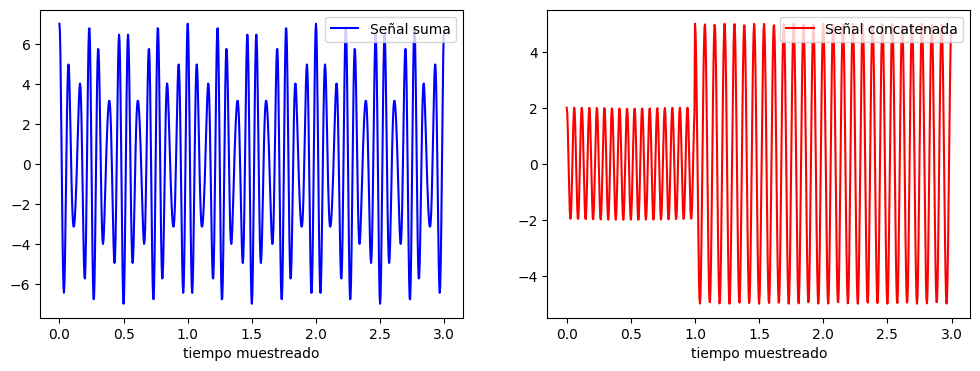

In [3]:
s=x1+x2
c=np.zeros(768)
c[:256]=x1[:256]
c[256:]=x2[256:]
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(tn,s, color='blue', label='Señal suma')
plt.legend(loc='upper right'), plt.xlabel('tiempo muestreado')
plt.subplot(122)
plt.plot(tn,c, color='red', label='Señal concatenada')
plt.legend(loc='upper right')
plt.xlabel('tiempo muestreado')
plt.show()

In [4]:
M=len(s)#Long de la señal

# boxcar -> senal rectangular
hr151=signal.boxcar(151) # siempre buscar longitudes impares
hb151=signal.blackman(151) 
f1, t1, Sxx1 = signal.spectrogram(s,fs=FM, window=hr151,  nfft=None, noverlap=None) #espectograma
f2, t2, Sxx2 = signal.spectrogram(s,fs=FM, window=hb151,  nfft=None, noverlap=None) # como no especifique el N, si no le pongo un nfft=None va a elegir por defecto la longitud de la ventana y me va a arruinar el mapa

f1_c, t1_c, Sxx1_c = signal.spectrogram(c,fs=FM, window=hr151,  nfft=None, noverlap=None) #espectograma
f2_c, t2_c, Sxx2_c= signal.spectrogram(c,fs=FM, window=hb151,  nfft=None, noverlap=None)

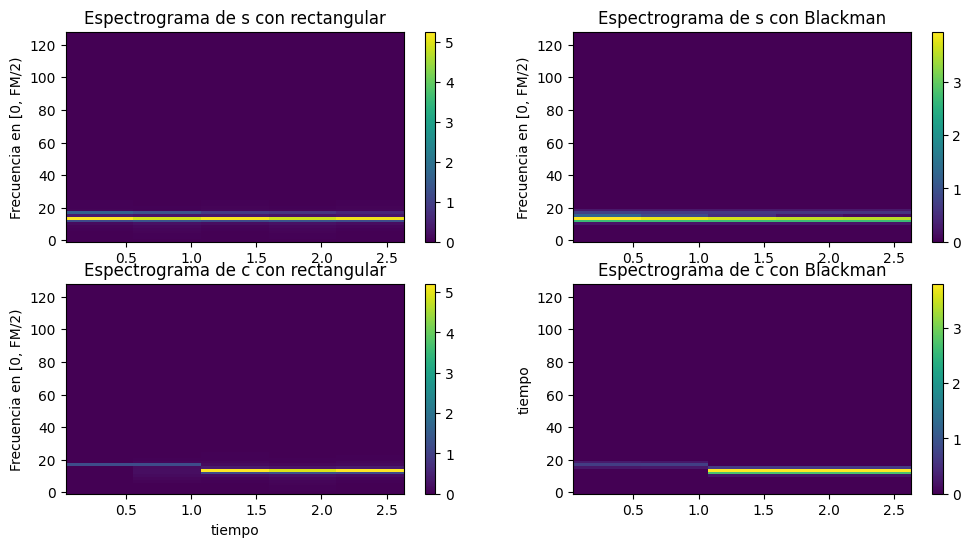

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.pcolormesh(t1, f1, Sxx1)
plt.title('Espectrograma de s con rectangular')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()

plt.subplot(222)
plt.pcolormesh(t2, f2, Sxx2)
plt.title('Espectrograma de s con Blackman')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()

plt.subplot(223)
plt.pcolormesh(t1_c, f1_c, Sxx1_c)
plt.title('Espectrograma de c con rectangular')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.xlabel('tiempo')
plt.colorbar()

plt.subplot(224)
plt.pcolormesh(t2_c, f2_c, Sxx2_c)
plt.title('Espectrograma de c con Blackman')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.ylabel('tiempo')
plt.colorbar()
plt.show()

* La senal s es estacionaria
* La senal c no lo es  (👁️ que si vemos la senal en el primer segundo podriamos pensar que es estacionaria)

## b) Analicemos estas señales...

son estacionarias? JUSTIFIQUE (rere pregunta de parcial)

In [18]:
print('Dimensión de los Espectrogramas')
print(Sxx1.shape)
print(Sxx2.shape)
print(Sxx1_c.shape)
print(Sxx1_c.shape)
print(Sxx1.shape[0], 'muestras entre 0 y la frecuencia de Nyquist')
print('Depende del N elegido en la DFT.N')

Dimensión de los Espectrogramas
(129, 5)
(129, 5)
(76, 5)
(76, 5)
129 muestras entre 0 y la frecuencia de Nyquist
Depende del N elegido en la DFT.N


In [19]:
print(Sxx1.shape[1], 'intervalos de longitud 151')
print(t1, 'vector de tiempos')
print('tenemos una transformada (en columna) para cada uno de esos tiempos')

5 intervalos de longitud 151
[ 25.5  70.5 115.5 160.5 205.5] vector de tiempos
tenemos una transformada (en columna) para cada uno de esos tiempos


## Ejercicio 2 
Repetir el ejercicio anterior cambiando

- 1ero: nfft=None por nfft=768
- 2do: noverlap=50 (45 es el 30% de 151, solapado)
- 3ero: cambiar la longitud de la ventanas, cambiamos resolución espacial para tener mejor resolución espectral

In [21]:
# ! TODO: terminar este ejercicio

## Aplicaciones
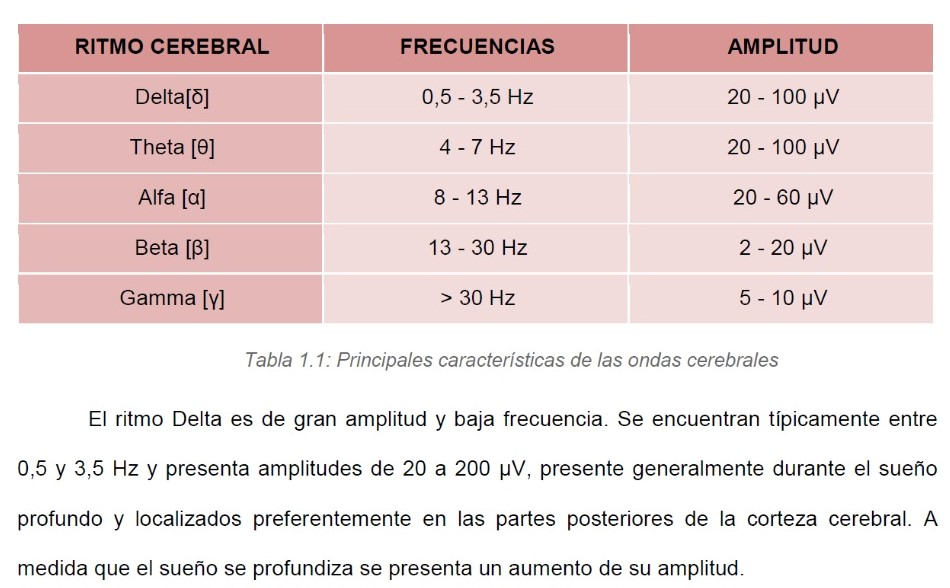

Gentileza de Maiztegui y Rochetti que rindieron su PI en 2022 en esta área, análisis de coinciencia - sueño

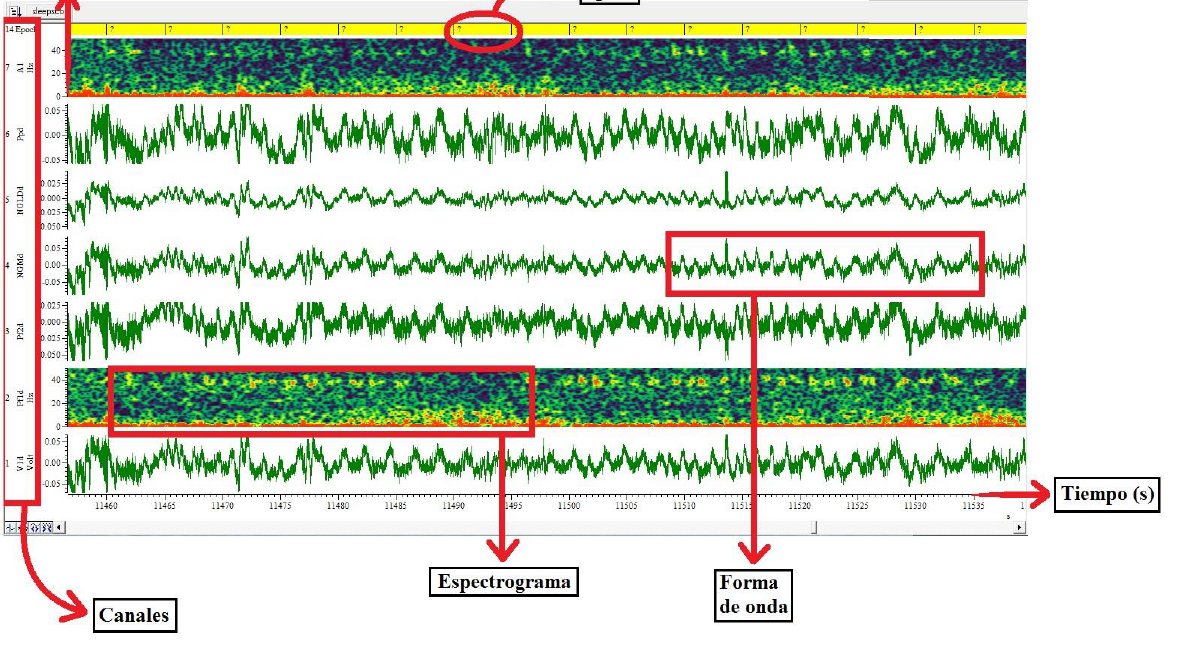

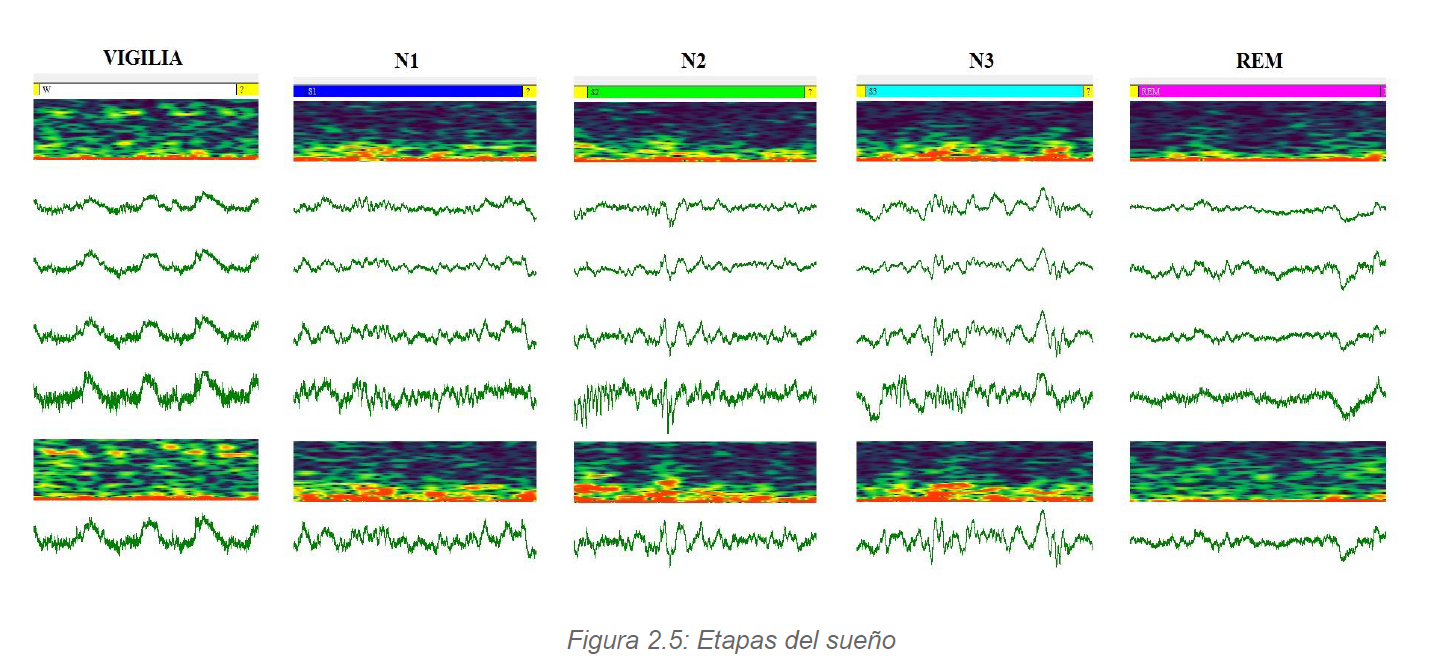

# Onditas (Capítulo 4, primera Parte)

Vamos a repasar un poco del teorico:
    
    

 En el abordaje con la transformada Ondita se descompone la señal como suma de señales de una base Ortonormal formada por una ondita madre $\psi$ junto con escalas y traslaciones de ésta: $\psi_{a,b}$ ($a$ escala, $b$ traslación):

 $x(t)= \sum_{a,b} C_{a,b}\, \psi_{a,b}(t)$

 Donde los coeficientes son $C_{a,b}=\left \langle x(t),\psi_{a,b}(t) \right \rangle$. 
 
El PI(producto interno) nos dice que tan parecida es la señal $x(t)$ a la señal de la base y su aporte en la descomposición.

* $C_{a,b}$ altos-> muy parecidas y mucho aporte de la señal $\psi_{a,b}(t)$ en la descomposición de $x(t)$.
* $C_{a,b}$ bajos-> más distintas y poco aporte de $\psi_{a,b}(t)$ en $x(t)$. 

## Onditas

Observación: Vamos a trabajar con dos familias de funciones:
* Función Ondita:   $\psi$ (psi)
* Función Escala:   $\phi$ (phi)
 
Características de la función ondita: 
 * De corta duración
 * Pasabanda
 * Oscilante

[scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html)

**Wavelets**

**morlet(M[, w, s, complete])**  Complex Morlet wavelet.

**ricker(points, a)**    Return a Ricker wavelet, also known as the “Mexican hat wavelet”.

**morlet2(M, s[, w])**  Complex Morlet wavelet, designed to work with cwt.

**cwt(data, wavelet, widths[, dtype])**   Continuous wavelet transform.


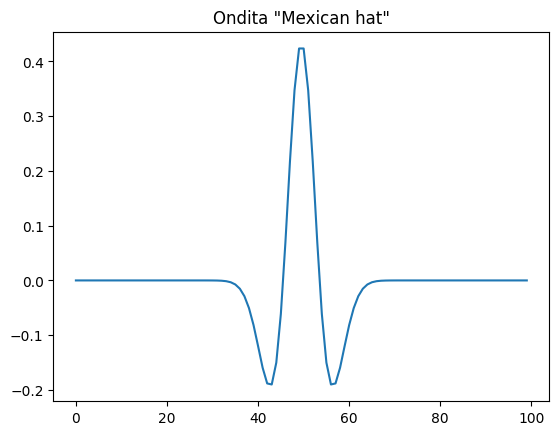

In [8]:
points = 100
a = 4.0 #escala
ondita=signal.ricker(points,a)
plt.plot(ondita)
plt.title('Ondita "Mexican hat"')
plt.show()

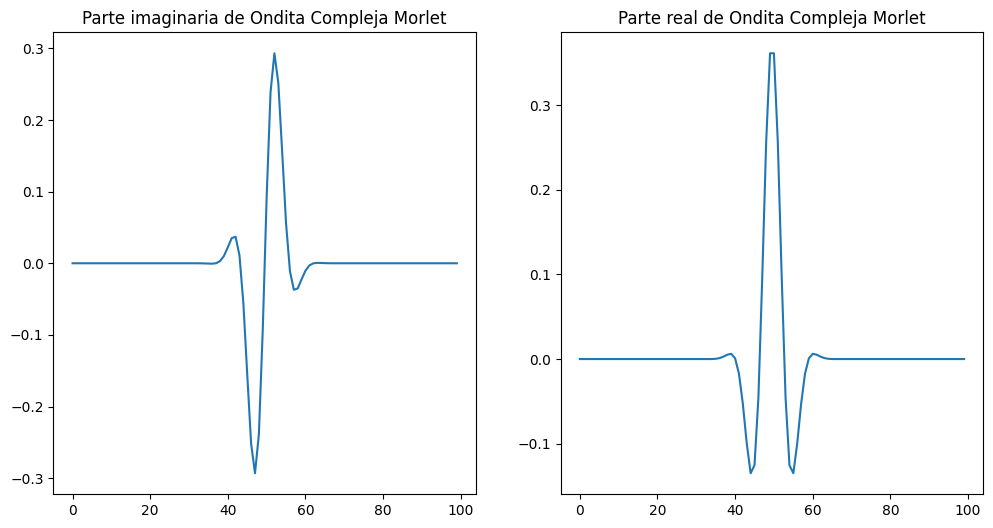

In [9]:
M = 100
s = 4.0 #escala
w = 2.0
wavelet = signal.morlet2(M, s, w)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(np.imag(wavelet))
plt.title('Parte imaginaria de Ondita Compleja Morlet')
plt.subplot(122)
plt.plot(np.real(wavelet))
plt.title('Parte real de Ondita Compleja Morlet')
plt.show()

Primero veamos el efecto de la escala en una ondita o en una señal cualquiera

**Factor escala** (dilatación o compresión)
 ¿Qué ocurre si cambiamos la escala de una señal? $x(t)\rightarrow x(\frac{t}{a})$  
* Cuando $0<a<1$  la señal se **“comprime”**, aumenta la frecuencia 
* Cuando  $1<a$ la señal se **“dilata”**, bajan las frecuencias


## Factor Escala


## Ejercicio 3

Dada la señal: $x(t)=\sin(6 \pi t)+2\cos(2\pi t)$, con $t \in [0,4)$. Muestrearla con período de muestreo $\frac{1}{64}$.

In [10]:
pi= np.pi
PM=1/64#período de muestreo
FM=64# 1/PM, frecuencia de muestreo en Hertz
t=np.arange(0,4,1/64)
print(len(t))
x=np.sin(6*pi*t)+2*np.cos(2*pi*t) 


256


Realizar un cambio de escala de factor $a=2$ y $a=\frac{1}{2}$

es decir genere las señales $x_2(t)=x(\frac{t}{2})$ y $x_{0.5}(t)=x(\frac{t}{1/2})$

In [11]:
xt2=np.sin(6*pi*(t/2))+2*np.cos(2*pi*(t/2))
xt05=np.sin(6*pi*(t*2))+2*np.cos(2*pi*(t*2))

Grafique las tres señales, original, dilatada ($a=2$) y comprimida ($a=\frac{1}{2}$), cada una con su espectrograma:

In [12]:
#Elegir una ventana que crea que sea mas apropiada
v=signal.blackman(61)

#Hacemos los espectrogramas usando transformada punto N
N=256 
FM=64
f1, t1, Sxx1 = signal.spectrogram(x,fs=FM, window=v, nfft=N , noverlap=None)
f2, t2, Sxx2 = signal.spectrogram(xt2, fs=FM, window=v, nfft=N, noverlap=None)
f3, t3, Sxx3 = signal.spectrogram(xt05,fs=FM, window=v, nfft=N, noverlap=None)


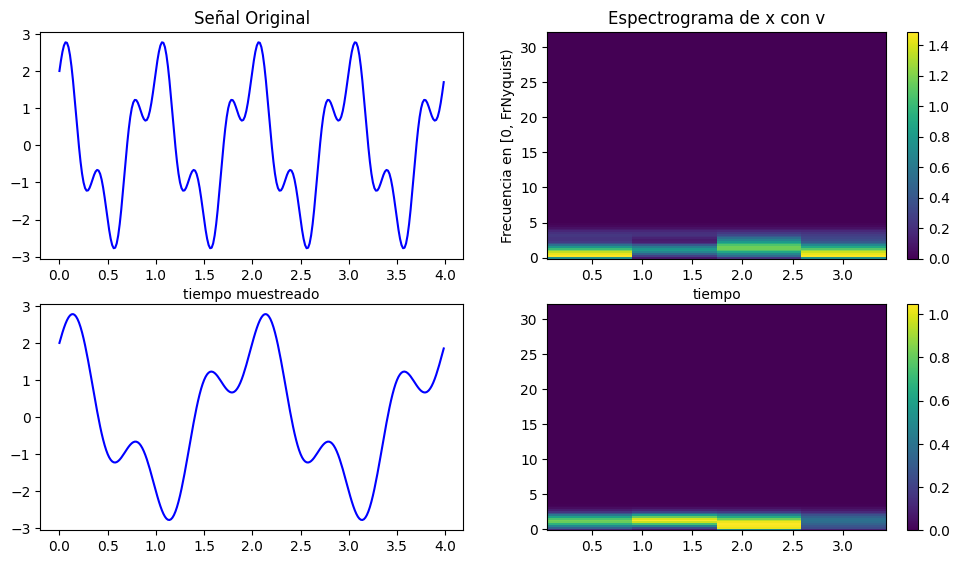

In [13]:
#completar 
plt.figure(figsize=(12, 10))
plt.subplot(321)
plt.plot(t,x, color='blue')
plt.title('Señal Original')
plt.xlabel('tiempo muestreado')

plt.subplot(322)
plt.pcolormesh(t1, f1, Sxx1)
plt.title('Espectrograma de x con v')
plt.ylabel('Frecuencia en [0, FrNyquist)')
plt.xlabel('tiempo')
plt.colorbar()

plt.subplot(323)
plt.plot(t,xt2, color='blue')
#...

plt.subplot(324)
plt.pcolormesh(t2, f2, Sxx2)
plt.colorbar()
#...



plt.show()
 

## Ejercicio 4 (solo interpretar)

 Ahora lo que vamos a hacer es modificar el número de muestras de la senal original y analizar sus espectrogramas. Que va a pasar con la componente de frecuencia si duplicamos el número de muestras? y Si lo reducimos a la mitad? 
 
Primero vamos a necesitar determinar cuantas muestras tiene x. (Intentar no usar ningun codigo para determinarlas)

In [14]:
cant_m=len(x)
print(cant_m)

x_sob=signal.resample(x,cant_m*2)
x_sub=signal.resample(x,cant_m//2)

256


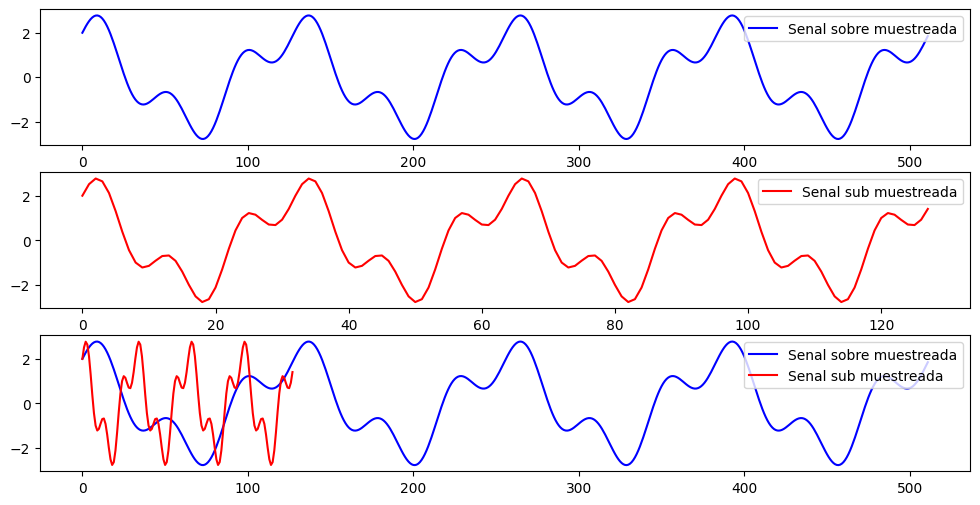

comparar las señales y la cantidad de muestras


In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.plot(x_sob, color='blue', label='Senal sobre muestreada')
plt.legend(loc='upper right')
plt.subplot(312)
plt.plot(x_sub, color='red', label='Senal sub muestreada')
plt.legend(loc='upper right')
plt.subplot(313)
plt.plot(x_sob, color='blue', label='Senal sobre muestreada')
plt.plot(x_sub, color='red', label='Senal sub muestreada')
plt.legend(loc='upper right')
plt.show()
print('comparar las señales y la cantidad de muestras')

In [16]:
v=signal.hamming( 51 )

#Hacemos los espectrogramas
f1, t1, Sxx1 = signal.spectrogram(x,window=v, nfft=N , noverlap=None)
f2, t2, Sxx2 = signal.spectrogram(xt2,window=v, nfft=N , noverlap=None)
f3, t3, Sxx3 = signal.spectrogram(xt05,window=v, nfft=N , noverlap=None)
f4, t4, Sxx4 = signal.spectrogram(x_sob,window=v, nfft=N , noverlap=None)
f5, t5, Sxx5 = signal.spectrogram(x_sub,window=v, nfft=N , noverlap=None)


plt.show()
print(len(t1),len(t2),len(t3),len(t4),len(t5)) 
print(len(f1),len(f2),len(f3),len(f4),len(f5)) 

5 5 5 11 2
129 129 129 129 129


Text(0.5, 0, 'número de muestras')

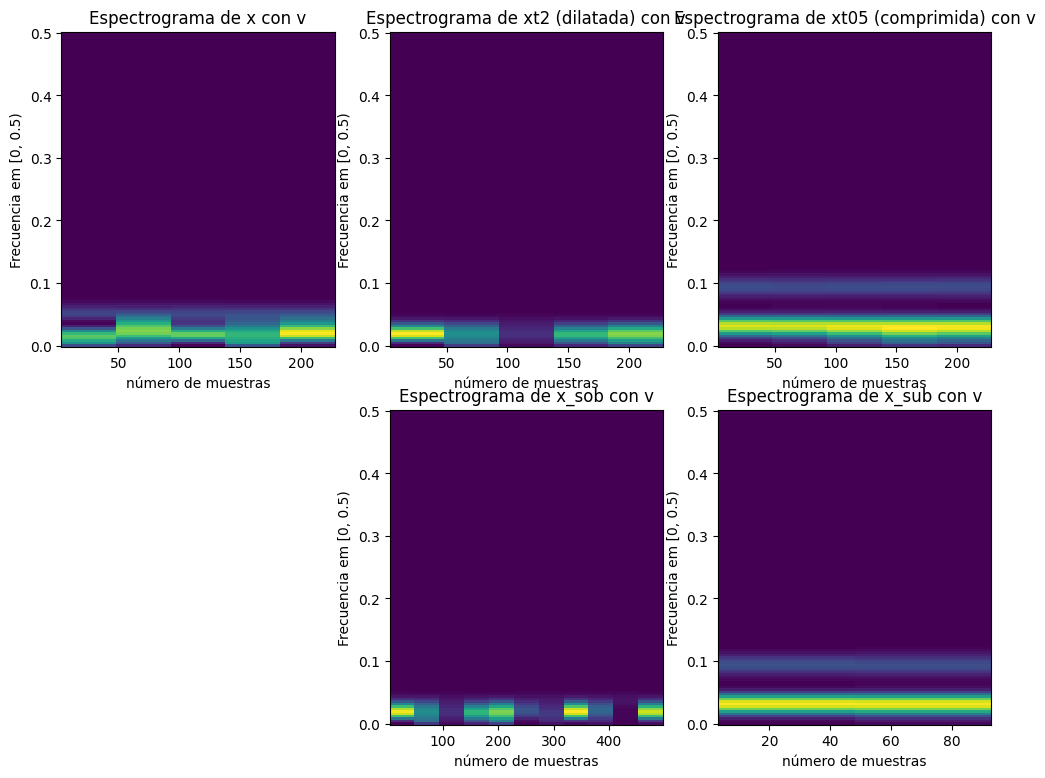

In [17]:
##modificar esto##
#completar con las cantidades de columnas y filas necesarias
plt.figure(figsize=(12,9))
plt.subplot(231)
plt.pcolormesh(t1, f1, Sxx1)
plt.title('Espectrograma de x con v')
plt.ylabel('Frecuencia em [0, 0.5)')
plt.xlabel('número de muestras')

plt.subplot(232)
plt.pcolormesh(t2, f2, Sxx2)
plt.title('Espectrograma de xt2 (dilatada) con v')
plt.ylabel('Frecuencia em [0, 0.5)')
plt.xlabel('número de muestras')

plt.subplot(233)
plt.pcolormesh(t3, f3, Sxx3)
plt.title('Espectrograma de xt05 (comprimida) con v')
plt.ylabel('Frecuencia em [0, 0.5)')
plt.xlabel('número de muestras')

plt.subplot(235)
plt.pcolormesh(t4, f4, Sxx4)
plt.title('Espectrograma de x_sob con v')
plt.ylabel('Frecuencia em [0, 0.5)')
plt.xlabel('número de muestras')


plt.subplot(236)
plt.pcolormesh(t5, f5, Sxx5)
plt.title('Espectrograma de x_sub con v')
plt.ylabel('Frecuencia em [0, 0.5)')
plt.xlabel('número de muestras')
#plt.colorbar()


**Conclusiones:**
* ¿Que pasa cuando la señal se dilata o se comprime? 
* ¿Que pasa cuando sobre muestreamos o submuestreamos?
* ¿Cuáles espectrogramas se parecen?
